In [1]:
#os.listdir("E:\\Bashir\\Resumes")

In [1]:
import os
import pandas as pd
import numpy as np
from pyresparser import ResumeParser


In [2]:
def data_parsing():
    resume_text = []
    for resume in list(os.listdir("E:\Bashir\Resumes\Resumes")):
        resume_text.append(ResumeParser("E:\Bashir\Resumes\Resumes\\" + resume).get_extracted_data())
    return resume_text

data = data_parsing()

In [3]:
name, email, mobile_number, skills = [], [], [], []
for i in range(0, len(data)):
    dictionary = data[i]
    name.append(dictionary['name'])
    email.append(dictionary['email'])
    mobile_number.append(dictionary['mobile_number'])
    skills.append(dictionary['skills'])

arr = np.array(skills, dtype = object)

for i in range(0, len(skills)):
    x = ', '.join(str(item) for item in skills[i])
    arr[i] = x


In [4]:
df = pd.DataFrame({'Name': name, 'Email': email, 'Mobile_Number': mobile_number, 'Skills': arr})

In [5]:
df.head()

,Name,Email,Mobile_Number,Skills
0,Ashfaq ulla K,ashfaqullak123@gmail.com,9186189405,"Servers, Administration, Training, Troubleshoo..."
1,ASIFALI BYALAL,asifbyalal543@gmail.com,7507810687,"Excel, Technical skills, Operating systems, Wi..."
2,Atul Pratap Singh,Email:tomaratul6@gmail.com,9907545358,"Web services, Engineering, System, Html, Tfs, ..."
3,Chinna Subbarayudu M,China.subbarayudu.m@gmail.com,9876543210,"Web services, Excel, Reporting, System, Matrix..."
4,Chinna Subbarayudu,China.subbarayudu.m@gmail.com,9876543210,"Web services, Excel, Reporting, System, Matrix..."


In [6]:
from tqdm import tqdm

l1 = [j for i in df['Skills'] for j in i.split(',')]
l2 = [i.strip() for i in l1]
# Removing whitespaces present in l1
skills = []
for i in tqdm(l2):
    if i not in skills:
        skills.append(i)
# tqdm is a library in Python which is used for creating Progress Meters or Progress Bars.
print('Number of Unique Values in skills : ',len(skills))

100%|████████████████████████████████████████████████████████████████████████████| 289/289 [00:00<00:00, 357356.68it/s]


Number of Unique Values in skills :  118


In [7]:
skill_set = pd.DataFrame(columns = skills)
for i in tqdm(range(len(df))):
    split_text = df.loc[i,'Skills'].split(',')
    cols = list(skill_set.columns)
    for j in range(len(split_text)):
        strip_text = split_text[j].strip(); skill_set.loc[i,strip_text] = 1 
        cols.remove(strip_text); skill_set.loc[i,cols] = 0
skill_set.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 31.29it/s]


,Servers,Administration,Training,Troubleshooting,Windows,Email,Lan,Technical,Mobile,Routing,...,Kivy,Os,Tkinter,Github,C++,Research,Datasets,Ibm,Numpy,Transactions
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
new_df = pd.concat([df, skill_set], axis = 1)
new_df.query('Python==1.0')

,Name,Email,Mobile_Number,Skills,Servers,Administration,Training,Troubleshooting,Windows,Email,...,Kivy,Os,Tkinter,Github,C++,Research,Datasets,Ibm,Numpy,Transactions
12,Siddharth Gupta,siddharth.workk@gmail.com,7417739782,"Pandas, Analysis, Cloud, Python, Aws, Kivy, Os...",0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


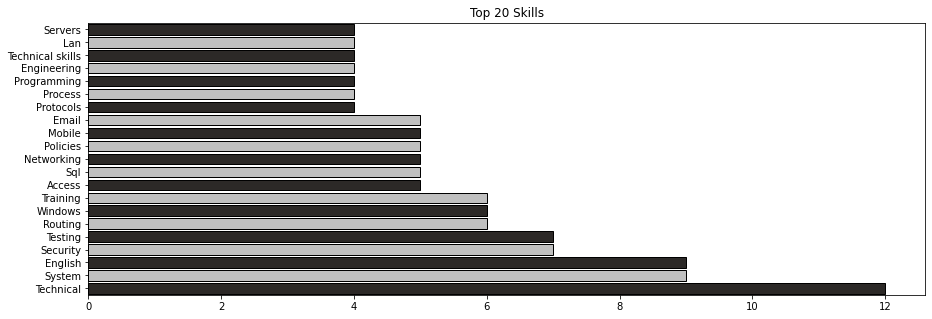

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#2D2926', '#C0C0C0']

c1 = []; l = []
for i in skill_set.columns:
    c1.append((sum(skill_set[i]),i)); l.append(sum(skill_set[i]))

top_20_skills = []; top_20 = []
for i in sorted(l)[-20:]:
    for j in c1:
        if i == j[0]:
            top_20_skills.append(j[1]);top_20.append(i)

plt.figure(figsize = (15,5))
ax = sns.barplot(x = top_20, y = top_20_skills, palette = colors, edgecolor = 'black');
plt.title('Top 20 Skills');